In [1]:
import openclean
import glob
import pandas as pd
import pyspark 
import numpy as np


In [2]:
pyspark.__version__

'3.2.0'

In [3]:
np.__version__

'1.21.4'

In [4]:
pd.__version__

'1.3.4'

In [5]:
import glob

In [6]:
glob.glob("*")

['DOB_Job_Application_Filings.csv',
 'DOB_Job_Cleaning.ipynb',
 'ic3t-wcy2.tsv.gz',
 'README.md',
 'wordcount.py']

In [7]:
df  = pd.read_csv('./DOB_Job_Application_Filings.csv', dtype='object')

In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774873 entries, 0 to 1774872
Data columns (total 96 columns):
 #   Column                         Non-Null Count    Dtype 
---  ------                         --------------    ----- 
 0   Job #                          1774873 non-null  object
 1   Doc #                          1774873 non-null  object
 2   Borough                        1774873 non-null  object
 3   House #                        1774867 non-null  object
 4   Street Name                    1774867 non-null  object
 5   Block                          1774121 non-null  object
 6   Lot                            1774117 non-null  object
 7   Bin #                          1774873 non-null  object
 8   Job Type                       1774873 non-null  object
 9   Job Status                     1774873 non-null  object
 10  Job Status Descrp              1774873 non-null  object
 11  Latest Action Date             1774873 non-null  object
 12  Building Type               

In [9]:
df.count()

Job #                   1774873
Doc #                   1774873
Borough                 1774873
House #                 1774867
Street Name             1774867
                         ...   
GIS_LONGITUDE           1769216
GIS_COUNCIL_DISTRICT    1769216
GIS_CENSUS_TRACT        1769216
GIS_NTA_NAME            1769216
GIS_BIN                 1752744
Length: 96, dtype: int64

### if any rows are complete duplicates, drop them

In [10]:
df = df.drop_duplicates()

In [11]:
df

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,440673512,01,QUEENS,10040,222 STREET,10780,00019,4231025,A2,R,...,N,NaN,A1,0,40.714365,-73.731171,27,568,Queens Village,4231025
1,421133972,02,QUEENS,88-36,139TH STREET,09620,00033,4623670,NB,P,...,N,NaN,G7,0,40.703428,-73.813796,24,214,Briarwood-Jamaica Hills,NaN
2,421133972,03,QUEENS,88-36,139TH STREET,09620,00033,4623670,NB,P,...,N,NaN,G7,0,40.703428,-73.813796,24,214,Briarwood-Jamaica Hills,NaN
3,210182309,02,BRONX,97,WEST 169 STREET,02519,00027,2130622,NB,P,...,N,NaN,V0,0,40.839538,-73.923177,16,211,Highbridge,NaN
4,210182309,03,BRONX,97,WEST 169 STREET,02519,00027,2130622,NB,P,...,N,NaN,V0,0,40.839538,-73.923177,16,211,Highbridge,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1774868,302042858,01,BROOKLYN,2770,OCEAN AVENUE,07404,00020,3202124,A3,X,...,N,NaN,D1,0,40.593831,-73.950368,48,592,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,3202124
1774869,302042867,01,BROOKLYN,313,76 STREET,05940,00078,3148750,A2,R,...,N,NaN,B1,0,40.630611,-74.027435,43,66,Bay Ridge,3148750
1774870,302042876,01,BROOKLYN,1658,66 STREET,05559,00033,3134197,A2,X,...,N,NaN,C3,0,40.620486,-73.994067,38,252,Bensonhurst West,3134197
1774871,302042885,01,BROOKLYN,173,LEXINGTON AVENUE,01968,00043,3056361,A2,Q,...,N,NaN,F9,0,40.687159,-73.955516,36,233,Bedford,3056361


In [12]:
df.columns#[5,6,13,14,20,21,32,38,59,60,68,74,75,76,77,79]

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In [13]:
df.head()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,440673512,01,QUEENS,10040,222 STREET,10780,00019,4231025,A2,R,...,N,NaN,A1,0,40.714365,-73.731171,27,568,Queens Village,4231025
1,421133972,02,QUEENS,88-36,139TH STREET,09620,00033,4623670,NB,P,...,N,NaN,G7,0,40.703428,-73.813796,24,214,Briarwood-Jamaica Hills,NaN
2,421133972,03,QUEENS,88-36,139TH STREET,09620,00033,4623670,NB,P,...,N,NaN,G7,0,40.703428,-73.813796,24,214,Briarwood-Jamaica Hills,NaN
3,210182309,02,BRONX,97,WEST 169 STREET,02519,00027,2130622,NB,P,...,N,NaN,V0,0,40.839538,-73.923177,16,211,Highbridge,NaN
4,210182309,03,BRONX,97,WEST 169 STREET,02519,00027,2130622,NB,P,...,N,NaN,V0,0,40.839538,-73.923177,16,211,Highbridge,NaN


## Take an initial look at Job #

In [14]:
df['Job #'].value_counts(dropna=False)

103408705    20
122705000    13
120438240    13
320843110    12
302136203    11
             ..
220173489     1
220173498     1
420542960     1
121002379     1
302042894     1
Name: Job #, Length: 1584321, dtype: int64

In [15]:
df['Job #'].min()

'100321046'

In [16]:
df['Job #'].max()

'577777776'

In [17]:
df.loc[df['Job #'].str.startswith('0')]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN


In [18]:
df['Job #'].count()

1774873

In [19]:
df['Job #'].nunique()

1584321

In [20]:
df.loc[df['Job #']=='103408705']

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
44593,103408705,02,MANHATTAN,555,W 23 STREET,00695,07503,1012345,NB,R,...,A,NaN,R0,0,40.748400,-74.005836,3,99,Hudson Yards-Chelsea-Flatiron-Union Square,1012345
44594,103408705,03,MANHATTAN,555,W 23 STREET,00695,07503,1012345,NB,R,...,A,NaN,R0,0,40.748400,-74.005836,3,99,Hudson Yards-Chelsea-Flatiron-Union Square,1012345
77020,103408705,08,MANHATTAN,555,W 23 STREET,00695,07503,1012345,NB,P,...,NaN,NaN,R0,0,40.748400,-74.005836,3,99,Hudson Yards-Chelsea-Flatiron-Union Square,1012345
77024,103408705,09,MANHATTAN,555,W 23 STREET,00695,07503,1012345,NB,P,...,NaN,NaN,R0,0,40.748400,-74.005836,3,99,Hudson Yards-Chelsea-Flatiron-Union Square,1012345
77103,103408705,04,MANHATTAN,555,W 23 STREET,00695,07503,1012345,NB,P,...,NaN,NaN,R0,0,40.748400,-74.005836,3,99,Hudson Yards-Chelsea-Flatiron-Union Square,1012345
77107,103408705,05,MANHATTAN,555,W 23 STREET,00695,07503,1012345,NB,P,...,NaN,NaN,R0,0,40.748400,-74.005836,3,99,Hudson Yards-Chelsea-Flatiron-Union Square,1012345
77109,103408705,06,MANHATTAN,555,W 23 STREET,00695,07503,1012345,NB,P,...,NaN,NaN,R0,0,40.748400,-74.005836,3,99,Hudson Yards-Chelsea-Flatiron-Union Square,1012345
77111,103408705,12,MANHATTAN,555,W 23 STREET,00695,07503,1012345,NB,P,...,NaN,NaN,R0,0,40.748400,-74.005836,3,99,Hudson Yards-Chelsea-Flatiron-Union Square,1012345
77115,103408705,13,MANHATTAN,555,W 23 STREET,00695,07503,1012345,NB,P,...,NaN,NaN,R0,0,40.748400,-74.005836,3,99,Hudson Yards-Chelsea-Flatiron-Union Square,1012345
77120,103408705,14,MANHATTAN,555,W 23 STREET,00695,07503,1012345,NB,P,...,NaN,NaN,R0,0,40.748400,-74.005836,3,99,Hudson Yards-Chelsea-Flatiron-Union Square,1012345


In [21]:
df.describe()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
count,1774873,1774873,1774873,1774867,1774867,1774121,1774117,1774873,1774873,1774873,...,1754670,172200,1768455,1774873,1769216,1769216,1769216,1769216,1769216,1752744
unique,1584321,20,5,35646,29553,13816,1971,363786,9,17,...,4,6374,199,13,217561,228338,51,1328,194,342803
top,103408705,01,MANHATTAN,1,BROADWAY,00016,00001,1015862,A2,X,...,N,10/24/2012,R0,0,40.748276,-73.984690,4,7,Midtown-Midtown South,3000000
freq,20,1583895,775342,17359,52273,6808,216451,2413,1117095,1050470,...,1519423,5513,211273,1772958,2409,2413,236661,16439,153871,15627


In [22]:
df.columns[:20]

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e'],
      dtype='object')

## Describe columns in groups so they fit on screen

In [23]:
df[df.columns[:20]].describe()

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,Job Status Descrp,Latest Action Date,Building Type,Community - Board,Cluster,Landmarked,Adult Estab,Loft Board,City Owned,Little e
count,1774873,1774873,1774873,1774867,1774867,1774121,1774117,1774873,1774873,1774873,1774873,1774873,1774873,1773578,1131380,1670754,1581426,1400834,149402,1046451
unique,1584321,20,5,35646,29553,13816,1971,363786,9,17,17,7374,2,106,2,4,2,2,4,5
top,103408705,01,MANHATTAN,1,BROADWAY,00016,00001,1015862,A2,X,SIGNED OFF,10/13/2017,OTHERS,105,N,N,N,N,Y,N
freq,20,1583895,775342,17359,52273,6808,216451,2413,1117095,1050470,1050470,793,1389737,210723,1122909,1461499,1581253,1393398,149399,989667


In [24]:
# Notes:
# Building Type looks binary and has 2 values + maybe NAN
# Cluster looks binary and has 2 values + maybe NAN
# Landmarked looks binary and has 4 values + maybe NAN
# Adult Estab looks binary and has 2 values + maybe NAN
# Loft Board looks binary and has 2 values + maybe NAN
# City Owned looks binary and has 4 values + maybe NAN
# Little e looks binary and has 5 values + maybe NAN


In [25]:
df[df.columns[20:40]].describe()

,PC Filed,eFiling Filed,Plumbing,Mechanical,Boiler,Fuel Burning,Fuel Storage,Standpipe,Sprinkler,Fire Alarm,Equipment,Fire Suppression,Curb Cut,Other,Other Description,Applicant's First Name,Applicant's Last Name,Applicant Professional Title,Applicant License #,Professional Cert
count,602206,1081520,555711,284299,49959,21451,14255,14386,116387,87703,306812,43370,61213,1041766,1039964,1774814,1774861,1774790,1725704,1396678
unique,2,2,1,1,1,1,2,1,1,1,1,1,1,1,16626,17354,35220,913,27089,5
top,Y,Y,X,X,X,X,X,X,X,X,X,X,X,X,GEN. CONSTR.,MICHAEL,HOQUE,PE,083278,Y
freq,384720,1081518,555711,284299,49959,21451,14254,14386,116387,87703,306812,43370,61213,1041766,316607,51059,19159,924260,19195,859594


In [26]:
# PC Filed -- Other all look binary, and have 1-2 values + maybe NAN
#
# Take a look at Other Description for weird strings

#  Lots of the same First and Last name

# Check names and titles

# APPLICATNT LICENCSE # NEEDS TO BE A STRING TO PERSERVE THE 0 ON IT (PROBABLY)

# Professional Cert looks binary and has 5 values + maybe NAN



In [27]:
df[df.columns[40:60]].describe()

,Pre- Filing Date,Paid,Fully Paid,Assigned,Approved,Fully Permitted,Initial Cost,Total Est. Fee,Fee Status,Existing Zoning Sqft,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height,Existing Dwelling Units
count,1774873,1765805,1768295,1195882,1444999,1309748,1774873,1774873,1774873,1774873,1774873,45822,32149,1774873,1774873,1774873,1774873,1774873,1774873,644113
unique,6623,6642,6709,6782,6888,6122,98627,93203,3,18057,24620,2,2,6970,1184,152,319,945,1102,1082
top,06/28/2019,06/28/2019,06/28/2019,07/01/2009,06/26/2008,11/12/2015,$0.00,$100.00,STANDARD,0,0,Y,Y,0,0,0,0,0,0,1
freq,1717,1700,1702,575,663,487,477561,144802,1600970,1704887,1673008,45815,32140,1713529,1677540,821455,396318,821473,454072,117787


In [28]:
# Need to convert date columns to pd.datetime
# RENAME PAID TO PAID DATE
# RENAME FULLY PAID TO FULLY PAID DATE
# RENAME ASSISGNED TO ASSIGNED DATE
# RENAME APPROVED TO APPROVED DATE

# CHECK COHERENCE OF PAID DATE <= FULLY PAID DATE
# CHECK COHERENCE OF PRE FILING DATE <= PAID DATE
# CHECK COHERENCE OF ASSIGNED DATE <= APPROVED DATE
# 

# REMOVE $ FROM Initial Cost and Total Estimated Fee, and put them in column name, convert values to floats

# Check What fee status is

# Check Existing Zoning Sqft, Propsed Zoning Sqft, Enlargement SQ Footage for reasonable values
# Change either Sqft to SQ Footage or vvice-versa

# Horizontal Enlrgmt and Vertical Enlrgmt are booleans + NAN
# Change Enlrgmt to Enlargement

#Chcek ExisitngNo. of Stories and proposed No. of Stories for reasonableness
# Add space between Existing and No.
# Change either Job# to Job No. or vice versa
# maybe just change all the No./# to "number"

# Check Existing and proposed height for reasonableness. Add unit to column name

# check Existing Dwelling Units for reasonableness 



In [29]:
df[df.columns[60:80]].describe()

,Proposed Dwelling Units,Existing Occupancy,Proposed Occupancy,Site Fill,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Owner Type,Non-Profit,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's House Number,Owner'sHouse Street Name,City,State,Zip,Owner'sPhone #
count,918750,1270615,1062769,1425022,1440085,193634,10263,262140,79918,1701479,1703326,1774593,1774658,1424258,1003,1003,1003,1003,1001,1763406
unique,1173,47,49,5,229,196,135,116,15,14,2,93118,156871,412722,549,756,114,9,212,359280
top,1,RES,RES,NOT APPLICABLE,R6,R8B,C6-6,MID,POPS,CORPORATION,N,MICHAEL,SINGH,OWNER,2,555 WEST 23RD STREET,BROOKLYN,NY,11201,7184728000
freq,172062,411653,289997,717129,149653,19305,1554,84262,27848,575535,1594188,40957,23629,11056,19,17,309,981,46,12732


In [30]:
# check Proposed Dwelling Units
## Why does Existing Occupancy have fewer cats than Proposed Occupancy. Check those.

# What is Site Fill. 

# Get list of NYC ZOning Districts and Special Districts

# Checmk Owner Typer for spelling issues

# Non Profit is binary

# Check Owners's First and last name

# Owner'sBuisness Name should not be "OWNER"

# Owner's house number, streeet name, city, state and zip have almost no values

# Why is the same phone number so common

In [31]:
df[df.columns[80:100]].describe()

,Job Description,DOBRunDate,JOB_S1_NO,TOTAL_CONSTRUCTION_FLOOR_AREA,WITHDRAWAL_FLAG,SIGNOFF_DATE,SPECIAL_ACTION_STATUS,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
count,1594531,1774873,1774873,1774873,1774873,1063365,1754670,172200,1768455,1774873,1769216,1769216,1769216,1769216,1769216,1752744
unique,1247253,298,1774873,26598,13,5920,4,6374,199,13,217561,228338,51,1328,194,342803
top,PROPOSED INSTALLATION OF HEAVY DUTY SIDEWALK S...,04/28/2021 00:00:00,3294002,0,0,02/12/2018,N,10/24/2012,R0,0,40.748276,-73.984690,4,7,Midtown-Midtown South,3000000
freq,3985,1674972,1,1619567,1752667,603,1519423,5513,211273,1772958,2409,2413,236661,16439,153871,15627


In [32]:

# That is a lot of unique job descriptions

# Add spaces to DOBRunDate name
# make DOBRunDate a datetime

# What is Job_S1_NO. It uses underscores.

# All the remaining columns have ALL CAPS NAMES WITH UNDERSCORES 
# TOTAL_CONSTRUCTION_FLOOR_AREA, WITHDRAWAL_FLAG

# SIGNOFF_DATE needs to be datetime
# SPECIAL_ACTION_STATUS
# SPECIAL_ACTION_DATE needs to be datetime
# BUILDING_CLASS
# What is JOB_NO_GOOD_COUNT
#
# maybe need GIS DATA
# GIS_LATITUDE
# GIS_LONGITUDE
# GIS_COUNCIL_DISTRICT
# GIS_CENSUS_TRACT
# GIS_NTA_NAME
# GIS_BIN
# 

In [33]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

## Renaming columns

In [34]:
df = df.rename(columns={
                          "Owner'sPhone #": "Owner's Phone #" 
                        , "Owner'sHouse Street Name": "Owner's House Street Name"
                        , "Paid": "Paid Date"
                        , "Fully Paid": "Fully Paid Date"
                        , "Assigned": "Assigned Date"
                        , "Approved": "Approved Date"
                        , "Job Status Descrp": "Job Status Description"
                        , "Community - Board": "Community Board"
                        , "Adult Estab": "Adult Establishment"
                        , "Pre- Filing Date": "Pre-Filing Date"
                        , "Total Est. Fee": "Total Estimated Fee"
                        , "Horizontal Enlrgmt": "Horizontal Enlargement"
                        , "Vertical Enlrgmt": "Vertical Enlargement"
                        , "ExistingNo. of Stories": "Existing # of Stories"
                        , "Proposed No. of Stories": "Proposed # of Stories"
                        , "Zoning Dist1": "Zoning District 1"
                        , "Zoning Dist2": "Zoning District 2"
                        , "Zoning Dist3": "Zoning District 3"
                        , "City ": "Owner's House City"
                        , "State": "Owner's House State"
                        , "Zip": "Owner's House Zip"
                        , "DOBRunDate": "DOB Run Date"
                       })

#Lower cased but not sure if this is necessary
'''
df = df.rename(columns={
                        , "JOB_S1_NO": "Job S1 #"
                        , "TOTAL_CONSTRUCTION_FLOOR_AREA": "Total Construction Floor Area"
                        , "WITHDRAWAL_FLAG": "Withdrawl Flag"
                        , "SIGNOFF_DATE": "Signoff Date"
                        , "SPECIAL_ACTION_STATUS": "Special Action Status"
                        , "SPECIAL_ACTION_DATE": "Special Action Date"
                        , "BUILDING_CLASS": "Building Class"
                        , "JOB_NO_GOOD_COUNT": "Job No Good Count"
                        , "GIS_LATITUDE": "GIS Latitude"
                        , "GIS_LONGITUDE": "GIS Longitude"
                        , "GIS_COUNCIL_DISTRICT": "GIS Council District"
                        , "GIS_CENSUS_TRACT": "GIS Census Tract"
                        , "GIS_NTA_NAME": "GIS NTA Name"
                        , "GIS_BIN": "GIS Bin"
                        })
'''

'\ndf = df.rename(columns={\n                        , "JOB_S1_NO": "Job S1 #"\n                        , "TOTAL_CONSTRUCTION_FLOOR_AREA": "Total Construction Floor Area"\n                        , "WITHDRAWAL_FLAG": "Withdrawl Flag"\n                        , "SIGNOFF_DATE": "Signoff Date"\n                        , "SPECIAL_ACTION_STATUS": "Special Action Status"\n                        , "SPECIAL_ACTION_DATE": "Special Action Date"\n                        , "BUILDING_CLASS": "Building Class"\n                        , "JOB_NO_GOOD_COUNT": "Job No Good Count"\n                        , "GIS_LATITUDE": "GIS Latitude"\n                        , "GIS_LONGITUDE": "GIS Longitude"\n                        , "GIS_COUNCIL_DISTRICT": "GIS Council District"\n                        , "GIS_CENSUS_TRACT": "GIS Census Tract"\n                        , "GIS_NTA_NAME": "GIS NTA Name"\n                        , "GIS_BIN": "GIS Bin"\n                        })\n'

In [35]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Description',
       'Latest Action Date', 'Building Type', 'Community Board', 'Cluster',
       'Landmarked', 'Adult Establishment', 'Loft Board', 'City Owned',
       'Little e', 'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical',
       'Boiler', 'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler',
       'Fire Alarm', 'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre-Filing Date', 'Paid Date', 'Fully Paid Date',
       'Assigned Date', 'Approved Date', 'Fully Permitted', 'Initial Cost',
       'Total Estimated Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlargement',
       'Vertical Enlargement', 'Enlargement SQ Footage', 'Str

In [36]:
def show_vals(column_name, show_rows=10, df=df):
    print("Top {} {}:\n".format(show_rows, column_name))
    print(df[column_name].value_counts(dropna=False)[:show_rows])
    print()

### House numbers can't be strings because some have dashes

In [37]:
show_vals('House #')

Top 10 House #:

1      17359
200    11853
100     8114
11      7231
10      7191
55      7166
40      7105
30      7098
2       6428
150     6380
Name: House #, dtype: int64



### House numbers shouldn't be words

In [38]:
df.loc[(~df['House #'].isna())
       &(df['House #'].str.isalpha())]['House #']

15453            ONE
1174319         PIER
1181056         PIER
1345828          ONE
1345994          ONE
1378376          ONE
1400308          ONE
1405901          ONE
1513818    MANHATTAN
Name: House #, dtype: object

In [39]:
df['House #'] = df['House #'].astype('str')

In [40]:
df.loc[(~df['House #'].isna())
       &(~df['House #'].str.isdigit())]['House #']

1            88-36
2            88-36
5           215-02
6            34-74
15           34-74
            ...   
1774660    186-200
1774661    186-200
1774687    372-380
1774710    633-639
1774855      26-28
Name: House #, Length: 332189, dtype: object

### These look like Apartment numbers mostly

In [41]:
df.loc[(~df['House #'].isna())
       &(~df['House #'].str.isdigit())
      &(~df['House #'].str.contains('-'))]['House #']

37           215B
71         270GAR
76         9 WEST
263         1715A
264         1715A
            ...  
1773945        7A
1774110      486A
1774528     539 A
1774534      140B
1774612      277A
Name: House #, Length: 11052, dtype: object

## Looking at Binary columns:

### Fix binary columns:

In [42]:

# Notes:
# Building Type looks binary and has 2 values + maybe NAN
# Cluster looks binary and has 2 values + maybe NAN
# Landmarked looks binary and has 4 values + maybe NAN
# Adult Estab looks binary and has 2 values + maybe NAN
# Loft Board looks binary and has 2 values + maybe NAN
# City Owned looks binary and has 4 values + maybe NAN
# Little e looks binary and has 5 values + maybe NAN
# PC Filed -- Other all look binary, and have 1-2 values + maybe NAN
#
# Take a look at Other Description for weird strings

# Professional Cert looks binary and has 5 values + maybe NAN
# Non Profit is binary



In [43]:
show_vals('Landmarked')
show_vals('Adult Establishment')
show_vals('Loft Board')
show_vals('City Owned')
show_vals('Little e')
show_vals('PC Filed')
show_vals('eFiling Filed')


Top 10 Landmarked:

N      1461499
Y       208863
NaN     104119
L          369
C           23
Name: Landmarked, dtype: int64

Top 10 Adult Establishment:

N      1581253
NaN     193447
Y          173
Name: Adult Establishment, dtype: int64

Top 10 Loft Board:

N      1393398
NaN     374039
Y         7436
Name: Loft Board, dtype: int64

Top 10 City Owned:

NaN    1625471
Y       149399
I            1
M            1
N            1
Name: City Owned, dtype: int64

Top 10 Little e:

N      989667
NaN    728422
Y       36056
H       20723
M           4
X           1
Name: Little e, dtype: int64

Top 10 PC Filed:

NaN    1172667
Y       384720
N       217486
Name: PC Filed, dtype: int64

Top 10 eFiling Filed:

Y      1081518
NaN     693353
R            2
Name: eFiling Filed, dtype: int64



In [44]:
show_vals('Plumbing')
show_vals('Mechanical')
show_vals('Boiler')
show_vals('Fuel Burning')
show_vals('Fuel Storage')
show_vals('Standpipe')
show_vals('Sprinkler')
show_vals('Fire Alarm')
show_vals('Equipment')
show_vals('Fire Suppression')
show_vals('Curb Cut')
show_vals('Other')

Top 10 Plumbing:

NaN    1219162
X       555711
Name: Plumbing, dtype: int64

Top 10 Mechanical:

NaN    1490574
X       284299
Name: Mechanical, dtype: int64

Top 10 Boiler:

NaN    1724914
X        49959
Name: Boiler, dtype: int64

Top 10 Fuel Burning:

NaN    1753422
X        21451
Name: Fuel Burning, dtype: int64

Top 10 Fuel Storage:

NaN    1760618
X        14254
N            1
Name: Fuel Storage, dtype: int64

Top 10 Standpipe:

NaN    1760487
X        14386
Name: Standpipe, dtype: int64

Top 10 Sprinkler:

NaN    1658486
X       116387
Name: Sprinkler, dtype: int64

Top 10 Fire Alarm:

NaN    1687170
X        87703
Name: Fire Alarm, dtype: int64

Top 10 Equipment:

NaN    1468061
X       306812
Name: Equipment, dtype: int64

Top 10 Fire Suppression:

NaN    1731503
X        43370
Name: Fire Suppression, dtype: int64

Top 10 Curb Cut:

NaN    1713660
X        61213
Name: Curb Cut, dtype: int64

Top 10 Other:

X      1041766
NaN     733107
Name: Other, dtype: int64



In [45]:
df['Landmarked'].fillna('N', inplace=True)
df['Little e'].fillna('N', inplace=True)
df['Adult Establishment'].fillna('N', inplace=True)
df['Loft Board'].fillna('N', inplace=True)
df['City Owned'].fillna('N', inplace=True)
df['PC Filed'].fillna('N', inplace=True)
df['eFiling Filed'].fillna('N', inplace=True)
df['Plumbing'].fillna('N', inplace=True)
df['Mechanical'].fillna('N', inplace=True)
df['Boiler'].fillna('N', inplace=True)
df['Fuel Burning'].fillna('N', inplace=True)
df['Adult Establishment'].fillna('N', inplace=True)
df['Fuel Storage'].fillna('N', inplace=True)
df['Standpipe'].fillna('N', inplace=True)
df['Sprinkler'].fillna('N', inplace=True)
df['Fire Alarm'].fillna('N', inplace=True)
df['Fire Suppression'].fillna('N', inplace=True)
df['Curb Cut'].fillna('N', inplace=True)
df['Other'].fillna('N', inplace=True)


In [46]:
df.loc[~df['City Owned'].isin(['Y', 'N']), 'City Ownded'] = 'N'

In [47]:
df.loc[~df['eFiling Filed'].isin(['Y', 'N']), 'eFiling Filed'] = 'N'

In [48]:
df.loc[~df['Landmarked'].isin(['Y', 'N'])]['Building Type'].value_counts()

OTHERS    392
Name: Building Type, dtype: int64

In [49]:
df.loc[~df['Landmarked'].isin(['Y', 'N'])]['Job Description'].value_counts()

ST BATHOLOMEW'S CHURCH COMMUNITY HOUSE     1
FLUSHING HS CAFETERIA                      1
FELDOR BILLARDS D/B/A FAT CAT BILLIARDS    1
PACIFIC GRILL                              1
NY CITY CENTER REHEARSAL SPACE             1
NY CITY CENTER -STUDIO 5                   1
HSA-UWC INC                                1
FIDDLE STICKS                              1
L'ECOLE                                    1
HAYDEN HALL                                1
ATRIUM FOOD COURT                          1
WESTSIDE CLUB                              1
NEW YORK BILLIARDS DBA SLATE               1
24 FIFTH AVEBUE BALLROOM                   1
BANK OF NEW YORK CAFETERIA/LOUNGE          1
VON                                        1
DESANTOS                                   1
ST REGIS ROOF                              1
FORD FOUNDATION                            1
2ND FLOR BANQUET ROOM                      1
7TH FLOOR COMMISSARY                       1
GORDON RAMSAY AT THE LONDON                1
TGI FRIDAY

In [50]:
df.loc[~df['Landmarked'].isin(['Y', 'N'])][["Owner's First Name", "Owner's Last Name","Owner's Business Name", "Owner's Phone #"]]

,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's Phone #
21652,EILEEN,TORRES,"BRONXWORKS, INC",7185083153
23301,TEITELBAUM,LEOPOLD,UTA,7189639260
23578,CHRISTOPHER,CAREY,HARMONIE CLUB,2123557400
23652,DAVID,SALCFAS,ALCONQUIN HOTEL TMES SQ.,2124199330
24258,TOM,JAVITIS,METROPOLITAN MUSEUM OF ART,2126502198
...,...,...,...,...
1601736,MARC,HASKELL,FIFTH AVE BALLROOM LLC,9175326400
1601761,HELMUNT,KROMAR,THE BANK OF NEW YORK,2126356441
1601778,RUSS,CHINNICI,1 BLEECKER STREET ASSOCIATES,9177506701
1601788,ANN,RENGANRDCHI,NaN,5162985929


In [51]:
df.loc[~df['Little e'].isin(['Y', 'N'])]['Building Type'].value_counts()

OTHERS          20104
1-2-3 FAMILY      624
Name: Building Type, dtype: int64

In [52]:
df.loc[~df['Little e'].isin(['Y', 'N'])]['Job Description'].value_counts()

REMOVAL AND INSTALLATION OF INTERIOR NON BEARING PARTITIONS AND RELATED FINISHES AS PER PLANS FILED HEREWITH.FILED IN CONJUCTION WITH ALTERATION 1 NUMBER 110463356. NO CHANGE IN USE, EGRESS OR OCCUPANCY UNDER THIS APPLICATION. JOB IS REVIEWED UNDER 2008 CODE IN CONJUNCTION WITH ALT 1 APPLICATION 110463356.    103
INSTALLATION OF SCAFFOLD AS PER DRAWINGS. SCAFFOLD SHALL COMPLY WITH CHAPTER #33 OF THE 2008 CODE. NO CHANGE IN USE, OCCUPANCY OR EGRESS UNDER THIS APPLICATION.                                                                                                                                                        64
HVAC AND MECHANICAL MODIFICATIONS AS PER PLANS FILED  AS PER PLANS FILED. FILED IN CONJUNCTION WITH ALTERATION TYPE 1 APPLICATION 110463356.  NO CHANGE IN USE, EGRESS OR OCCUPANCY UNDER THIS APPLICATION.JOB IS REVIEWED UNDER 2008 CODE IN CONJUNCTION WITH ALT 1 APPLICATION 110463356.                             55
PROPOSED INSTALLATION OF HEAVY DUTY SIDEWALK SHED FILED

In [53]:
df.columns

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Description',
       'Latest Action Date', 'Building Type', 'Community Board', 'Cluster',
       'Landmarked', 'Adult Establishment', 'Loft Board', 'City Owned',
       'Little e', 'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical',
       'Boiler', 'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler',
       'Fire Alarm', 'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre-Filing Date', 'Paid Date', 'Fully Paid Date',
       'Assigned Date', 'Approved Date', 'Fully Permitted', 'Initial Cost',
       'Total Estimated Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlargement',
       'Vertical Enlargement', 'Enlargement SQ Footage', 'Str

In [54]:
# Many of these values are the same but spelled differently
show_vals('Other Description')

Top 10 Other Description:

NaN                734909
GEN. CONSTR.       316607
GC                 116243
GEN. CONSTR         87350
STRUCTURAL          55577
BPP                 50690
GEN CONST           42153
SOLAR TAX           33572
GEN.CONSTRUCTN.     26544
FACADE              22633
Name: Other Description, dtype: int64



In [55]:
df['Other Description'].fillna('', inplace=True)
df['Other Description'] = df['Other Description'].str.upper()

In [56]:
df.loc[df['Other Description'].str.contains('GEN')]['Other Description'].value_counts()[:50]

GEN. CONSTR.       316615
GEN. CONSTR         87351
GEN CONST           42204
GEN.CONSTRUCTN.     26544
GEN. CONST.         10511
GEN CONSTR           5084
GEN CONST.           4810
GEN CONSTRUCT        3646
GENERAL CONSTRU      2216
GEN CONS             1199
GEN.CONST.           1058
GENERAL CONST.        868
GENERAL CONST         863
GEN CONSTRUC          749
GEN.CONSTR.           577
GEN.CONST             408
GEN.CONSTRUCT         385
GEN CON               363
GENERATOR             363
GEN'L CONSTRUCT       347
GEN.CONSTRUCT.        345
GEN CONSTRUCTIO       341
GEN. CONST            301
GENERAL CONSTR        285
GENERAL               271
GENL CONSTR           200
GEN.CONSTRUCTIO       199
GENERAL CONSTR.       141
GENERAL CONSTRT       117
GEN COSNTRUCT         102
GEN.CONSTRUCTN,        97
GEN CONSTRUCT.         80
GENERAL WORK           75
GEN'L CONST            70
DEMO/GEN.CONSTR        64
GENCONSTRUCTION        64
GEN CONST/STRUC        63
GEN CONSTR.            62
GEN'L CONSTR

In [57]:
gen_strs = df.loc[(df['Other Description'].str.contains('GEN'))
      &(~ df['Other Description'].str.contains('EMER'))
      &(~ df['Other Description'].str.contains('ENL'))
      &(~ df['Other Description'].str.contains('GENERAT'))]['Other Description'].unique()

In [58]:
gen_strs

array(['GEN. CONSTR.', 'GENERAL CONSTR', 'GEN CONST', 'GEN. CONSTR',
       'GEN CONST/STRUC', 'GEN CONSTRUCT', 'GEN CONST.', 'GEN. CONST.',
       'GEN.CONSTRUCTN.', 'GENERAL CONSTRU', 'GENERAL CONST.',
       'GENARAL CONST.', 'GENN CONST', 'GEN CON', 'GENERAL CONSTRT',
       'GEN. CONSTRUCT.', 'GEN. CON.', "GEN'L CONSTRUCT", 'GEN CONSTR',
       'GENERAL CONTRUC', 'GENERAL CONST', 'GENERAL', 'GENCONSTRUCTION',
       'GEN CON/STRUC', 'GEN. CONST', 'GEN CONS', 'GEN CONS/ZONING',
       'GEN.CONST', 'GEN.CONSTRUCT.', 'GEN. CONSTRUCTI', 'GEN CONSTRUC',
       'GEN.CONST.', 'GEN. OCNSTR', 'GEN. COMST.', 'GEN.CONSTRTUCTN',
       'GEN CONSTRUCT.', 'GEN. CONST/STRU', 'GEN. CONSTRUCT',
       'GEN CONSTR.', 'GEN. REPAIRS', 'GENERAL COST.', 'GEN CON/ST',
       'GEN.CONSTRUCT', 'GEN CONSTRUCTIO', 'GEN CONST/ZO',
       'GENERAL CONSTR.', 'GEN RENOVATION', 'GENERAL RENOVAT',
       'GEN.CONSTR.', 'GEN. CONST -HRT', 'OT-HRT GEN CONS',
       'GEN CON/STRUCT', 'DEMO/GEN.CONSTR', 'ST/GEN. CONS

In [59]:
df.loc[(~df['Other Description'].str.contains('GEN'))
      &(~ df['Other Description'].str.contains('EMER'))
      &(~ df['Other Description'].str.contains('ENL'))
      &(~ df['Other Description'].str.contains('GENERAT'))]['Other Description'].value_counts()[:50]

                   734909
GC                 116257
STRUCTURAL          61380
BPP                 50690
SOLAR TAX           33572
FACADE              22635
CONSTRUCTION        20551
NO WORK             16616
ANTENNA             14063
AWNING              13847
PARTITIONS          13475
G.C.                12055
ARCHITECTURAL       10898
SOLAR                9008
ARCH                 4847
FPP                  4713
SOE                  4432
FOUNDATION           4126
CONST.               3188
G.C                  2713
CONSTR               2510
CONST                2504
TEMP INSTALL         2317
INTERIOR DEMO        1945
PARTITION            1618
SHORING              1616
DUNNAGE              1494
FACADE REPAIR        1314
STRUCTURE            1258
UNDERPINNING         1194
CHIMNEY LINER        1030
SIGN STRUCTURE       1018
DEMO                  969
LEGALIZATION          942
MARQUEE               846
INT. DEMO             710
STR                   698
GC NO WORK            659
FACADE REPAI

In [60]:
# Should remove "MR" when found
show_vals("Applicant's First Name")

Top 10 Applicant's First Name:

MICHAEL    51059
JOHN       44296
ROBERT     41756
DAVID      35926
PAUL       32698
ANTHONY    29881
JAMES      27063
JOSEPH     26992
THOMAS     24209
PETER      21917
Name: Applicant's First Name, dtype: int64



In [61]:
df["Applicant's First Name"] = df["Applicant's First Name"].astype('str')

In [62]:
# Unclear if these are actual first names mostly (Except for WU (woody))
df.loc[df["Applicant's First Name"].str.contains(" ")]["Applicant's First Name"].value_counts()

MD TOHFAZ      3090
KO SHEK        1633
JUNG WOR       1228
PING MAN       1133
WU (WOODY)     1119
               ... 
JOHN OLIVER       1
JAMES DEAN        1
CHOON HONG        1
LLOYD MACK        1
JOAN BOOYE        1
Name: Applicant's First Name, Length: 2790, dtype: int64

In [63]:
df["Applicant's Last Name"] = df["Applicant's Last Name"].astype('str')

In [64]:
# At least one of thesse is not all caps, and clearly there are periods in some
show_vals("Applicant's Last Name")

Top 10 Applicant's Last Name:

HOQUE         19159
KATZ          15126
LEE           14513
RUDIKOFF      12109
GERAZOUNIS    11126
BAILEY        10826
CALIENDO       9306
CHEN           9110
SYED-NAQVI     7299
MASS           6665
Name: Applicant's Last Name, dtype: int64



In [65]:
# Most of these are the same
show_vals("Applicant Professional Title", show_rows=50)

Top 50 Applicant Professional Title:

PE                 924260
RA                 796695
GC                  12762
OT                  10619
G.C                  5707
CONTRACTOR           3314
DEMO CONTRACTOR      2087
DEMO                 1973
PERMIT BROKER        1765
GEN CONTRACTOR       1504
G.C.                 1492
Contractor           1355
OWNER                1228
Demo Contractor       639
X                     534
DEMO CONTR            476
GEN. CONTRACTOR       451
SIGN HANGER           350
GENERAL CONTRAC       348
LA                    267
SIGN PERMIT AGT       248
Demolition Cont       242
SUBCONTRACTOR         232
Owner                 194
G. CONTRACTOR         177
GEN.CONTRACTOR        172
PLLC                  161
LAND SURVEYOR         131
G. C.                 129
General Contrac       124
GEN CONT              108
DEMO CONT             106
DEMO. CONTR           105
contractor            100
Gen. Contractor        95
G C                    94
G CONTRACTOR           93


In [66]:
show_vals('Applicant License #', show_rows=20)

Top 20 Applicant License #:

NaN       49169
083278    19195
050579    16342
066709    12092
013529    10886
082770    10711
020419    10230
020241     9350
080123     8246
038964     7522
045101     6732
058375     6614
076082     6570
066791     6334
035290     6109
053541     6031
054953     5945
029017     5627
075316     5354
071719     5290
Name: Applicant License #, dtype: int64



In [67]:
# Some of these are obviously wrong
show_vals('Professional Cert')

Top 10 Professional Cert:

Y      859594
N      537080
NaN    378195
J           2
F           1
R           1
Name: Professional Cert, dtype: int64



## Checking money consistency

In [68]:
#look at top 10 initial cost
show_vals("Initial Cost")

Top 10 Initial Cost:

$0.00        477561
$10000.00     57794
$1000.00      55261
$3000.00      51157
$5000.00      50529
$20000.00     43246
$15000.00     38850
$25000.00     35438
$30000.00     30253
$50000.00     30054
Name: Initial Cost, dtype: int64



In [69]:
#changes the type into string
df['Initial Cost'] = df['Initial Cost'].astype('str')

### Checks if there are values that do not contain a decimal

In [70]:
df.loc[~df["Initial Cost"].str.contains(".", regex=False)]["Initial Cost"].value_counts()

Series([], Name: Initial Cost, dtype: int64)

In [71]:
df['Initial Cost'] = df['Initial Cost'].astype('str')

### Dollar signs should be removed and added to column name

In [72]:
df["Initial Cost"] = df["Initial Cost"].str.replace("$", '', regex=False)

### Can't convert this to integer dollars because there are decimals.

In [73]:
df.loc[df["Initial Cost"].str.contains("\.[^0]", regex=True)]["Initial Cost"]

42832      387329.94
63602      701803.69
65789       70656.25
325481      78474.75
673296     189851.98
1763826       269.23
Name: Initial Cost, dtype: object

In [74]:
#changes the type into float
df["Initial Cost"] = df["Initial Cost"].astype('float')

In [75]:
df["Initial Cost"].value_counts(dropna=False)

0.0         477561
10000.0      57794
1000.0       55261
3000.0       51157
5000.0       50529
             ...  
94547.0          1
815400.0         1
3908.0           1
102761.0         1
555593.0         1
Name: Initial Cost, Length: 98627, dtype: int64

In [76]:
df["Initial Cost"]

0           6900.0
1              0.0
2              0.0
3              0.0
4              0.0
            ...   
1774868    25000.0
1774869    40000.0
1774870    20000.0
1774871    20500.0
1774872     8000.0
Name: Initial Cost, Length: 1774873, dtype: float64

<AxesSubplot:ylabel='Frequency'>

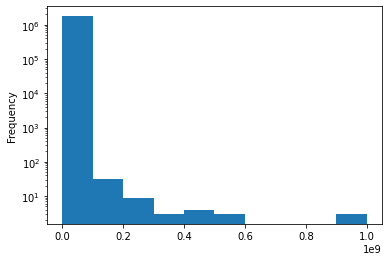

In [77]:
df["Initial Cost"].plot(kind='hist', log=True)

### With numerical values we can identify additional issues

In [78]:
# Not possible
df["Initial Cost"].min()

-33000.0

In [79]:
# Obviously a fill-in
df["Initial Cost"].max()

999999999.0

In [80]:
df.loc[df['Initial Cost'] < 0]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN,City Ownded
77094,302188718,07,BROOKLYN,105,LINCOLN PLACE,00948,00072,3019516,A2,P,...,NaN,B9,0,40.676403,-73.976292,39,159,Park Slope-Gowanus,3019516,NaN
270725,500577985,01,STATEN ISLAND,19,RUPERT AVENUE,01972,00092,5033950,A2,X,...,NaN,B9,0,40.598070,-74.132414,50,27302,New Springville-Bloomfield-Travis,5033950,NaN


In [81]:
#removes all dataset with initial cost < 0 or set to 0
#current it just sets it to 0
df.loc[df['Initial Cost'] < 0] = 0

In [82]:
#the entire line is filled with fake and false information
df.loc[df['Initial Cost'] == 999999999]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN,City Ownded
1076602,140595354,01,MANHATTAN,1,BISTEST STREET,00001,00001,1813361,A2,D,...,03/18/2017,O3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.loc[df['Initial Cost']>= 9000000]["Initial Cost"]

150        81900000.0
499        14975000.0
836        13982000.0
900        10000000.0
1203       14708125.0
              ...    
1766641    40000000.0
1768852    10200000.0
1769126    21574830.0
1769799    14400000.0
1770287    10002000.0
Name: Initial Cost, Length: 1600, dtype: float64

In [84]:
#drops the column above because it contains a lot of invalid variables
df["Initial Cost"] = df["Initial Cost"].astype('float')
df = df.drop(df[df['Initial Cost'] == 999999999].index)

In [85]:
#checks if it's been removed
df["Initial Cost"] = df["Initial Cost"].astype('float')
df.loc[df['Initial Cost'] == 999999999]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN,City Ownded


In [86]:
df["Initial Cost"].max()

966331800.0

In [87]:
#nothing wrong with this one anymore
df.loc[df['Initial Cost'] == 966331800]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN,City Ownded
663118,201028930,01,BRONX,470,JACKSON AVENUE,02578,00027,2003910,A2,X,...,NaN,W1,0,40.811162,-73.909804,8,35,Mott Haven-Port Morris,2003910,NaN


#### Total Estimated Fee

In [88]:
show_vals("Total Estimated Fee")
show_vals("Fee Status")

Top 10 Total Estimated Fee:

$100.00    144801
$0.00       58846
$160.00     58050
$130.00     55733
$225.00     42217
$140.00     33609
$200.00     31413
$191.50     26906
$294.50     20432
$346.00     18524
Name: Total Estimated Fee, dtype: int64

Top 10 Fee Status:

STANDARD    1600968
EXEMPT       168158
DEFERRED       5745
0                 2
Name: Fee Status, dtype: int64



In [89]:
df['Total Estimated Fee'] = df['Total Estimated Fee'].astype('str')

In [90]:
df.loc[~df["Total Estimated Fee"].str.contains(".", regex=False)]["Total Estimated Fee"].value_counts()

0    2
Name: Total Estimated Fee, dtype: int64

In [91]:
#removes the $ in the string
df["Total Estimated Fee"] = df["Total Estimated Fee"].str.replace("$", '', regex=False)

In [92]:
df['Total Estimated Fee'] = df['Total Estimated Fee'].astype('float')

In [93]:
df['Total Estimated Fee'].min() 

0.0

In [94]:
df['Total Estimated Fee'].max()

31500000.0

<AxesSubplot:ylabel='Frequency'>

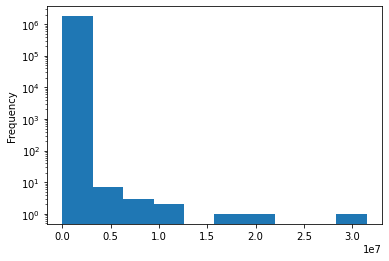

In [95]:
df['Total Estimated Fee'].plot(kind='hist', log=True)

## Checking owner's information

In [96]:
show_vals("Owner's Business Name")
show_vals("Owner's House Number")
show_vals("Owner's House Street Name")
show_vals("Owner's House City")
show_vals("Owner's House State")
show_vals("Owner's House Zip")

Top 10 Owner's Business Name:

NaN                                 350613
OWNER                                11056
NY SCHOOL CONSTRUCTION AUTHORITY      9758
NONE                                  9558
NYC SCA                               9228
VORNADO OFFICE MANAGEMENT             6990
NYCHA                                 6652
SL GREEN REALTY CORP.                 5696
NYC HOUSING AUTHORITY                 5696
NEW YORK CITY HOUSING AUTHORITY       4737
Name: Owner's Business Name, dtype: int64

Top 10 Owner's House Number:

NaN      1773869
2             19
30-30         18
555           17
22            16
100           16
1950          16
10            12
250           11
32            11
Name: Owner's House Number, dtype: int64

Top 10 Owner's House Street Name:

NaN                            1773869
555 WEST 23RD STREET                17
22 CHAPEL STREET                    10
1559 49TH STREET                     9
30-30 THOMSON AVENUE                 9
35 N TYSON AVENUE STE#10

### Fixing owner's informations

In [97]:
df.loc[~df["Owner's Business Name"].isna() & df["Owner's Business Name"].str.contains("(?i)new york city")]["Owner's Business Name"].value_counts()

NEW YORK CITY HOUSING AUTHORITY     4737
New York City Housing Authority      388
NEW YORK CITY ECONOMIC DEVELOPME      99
NEW YORK CITY SCHOOL CONSTRUCTIO      82
FIRE DEPARTMENT OF NEW YORK CITY      70
                                    ... 
NEW YORK CITY ECONOMIC DEVEL. CO       1
NEW YORK CITY ECONOMIC DEVEL COR       1
NEW YORK CITY ECONOMICAL DEV COR       1
NEW YORK CITY PARKS DEPT.              1
BWT, New York City DEP                 1
Name: Owner's Business Name, Length: 230, dtype: int64

#### Normalizes a couple of duplicate names

In [98]:
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace("NEW YORK CITY", "NYC")
df["Owner's Business Name"] = df["Owner's Business Name"].str.upper()
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace(".", '', regex=False)
df["Owner's Business Name"] = df["Owner's Business Name"].str.replace(",", '', regex=False)

#### All these are the same thing. Uses clusters to fix

In [99]:
df.loc[~df["Owner's Business Name"].isna() & df["Owner's Business Name"].str.contains("(?i)HOUSING AUTHORITY")]["Owner's Business Name"].value_counts()

NYC HOUSING AUTHORITY               11457
NEW YORK CITY HOUSING AUTHORITY       389
NEW YORK HOUSING AUTHORITY            140
NY CITY HOUSING AUTHORITY              66
NYCHA NY HOUSING AUTHORITY             64
NYCHOUSING AUTHORITY                   30
NY HOUSING AUTHORITY                   25
NYC HOUSING AUTHORITY (NYCHA)          23
NYC  HOUSING AUTHORITY                 15
NEW YORK CTY HOUSING AUTHORITY          6
N Y C HOUSING AUTHORITY                 6
NYC HOUSING AUTHORITY- CAD              6
NEW YORK HOUSING AUTHORITY- DESI        4
NEWYORK CITY HOUSING AUTHORITY          3
NEW YORK  CITY HOUSING AUTHORITY        3
NYCITY HOUSING AUTHORITY                3
NYC HOUSING HOUSING AUTHORITY           3
NEW YORK CITY HHOUSING AUTHORITY        3
NEW CITY HOUSING AUTHORITY              3
NEW YOR CITY HOUSING AUTHORITY          2
NYC-HOUSING AUTHORITY                   2
NEW YORK CITH HOUSING AUTHORITY         2
YC HOUSING AUTHORITY                    2
NYC - HOUSING AUTHORITY           

#### All these states are valid

In [100]:
df["Owner's House State"].value_counts()

NY    980
NJ     11
CA      3
CT      3
0       2
MD      1
MA      1
KY      1
VA      1
MO      1
Name: Owner's House State, dtype: int64

#### Since the states can be outside NYC, these are probably fine

In [101]:
df["Owner's House Zip"].value_counts()

11201    46
10011    31
10022    30
11220    30
11219    27
         ..
02895     1
10523     1
08054     1
11502     1
11436     1
Name: Owner's House Zip, Length: 213, dtype: int64

## Looking at Phone Numbers:

#### A lot of the same phone numbers

In [102]:
show_vals("Owner's Phone #")

Top 10 Owner's Phone #:

7184728000    12732
NaN           11467
2128947000    10345
2128637625     5610
7183924921     4411
2122161664     4190
2124072400     3922
7184728534     3346
2125295688     3313
5169355555     3288
Name: Owner's Phone #, dtype: int64



In [103]:
df["Owner's Phone #"] = df["Owner's Phone #"].astype('str')

#### All from the same business name so it makes sense

In [104]:
df.loc[df["Owner's Phone #"].str.contains("7184728000")][["Owner's First Name", "Owner's Last Name","Owner's Business Name", "Owner's Phone #"]]

,Owner's First Name,Owner's Last Name,Owner's Business Name,Owner's Phone #
6,JOSEPH,SCALISI,SCHOOL CONSTRUCTION AUTHORITY,7184728000
15,JOSEPH,SCALISI,SCHOOL CONSTRUCTION AUTHORITY,7184728000
34,JOSEPH,SCALISI,NYCSCA,7184728000
74,SRIDHAR,DULPETA-RAMA,SCHOOL CONSTRUCTION AUTHORITY,7184728000
129,EFFIE,TSITIRIDIS,SCHOOL CONSTRUCTION AUTHORITY,7184728000
...,...,...,...,...
1770710,MICHAEL,KALEDA,NYCSA,7184728000
1770851,AMY,LINDEN,NYS BOARD OF EDUCATION,7184728000
1770852,AMY,LINDEN,NYS BOARD OF EDUCATION,7184728000
1771916,AMY,LINDEN,NYS BOARD OF EDUCATION,7184728000


#### Phone numbers should not contain "-"

In [105]:
df.loc[~df["Owner's Phone #"].isna() & df["Owner's Phone #"].str.contains("-")]["Owner's Phone #"].value_counts()

212582-455    3
212490192-    2
71852751-1    2
0-            2
21255736--    2
212816-22-    1
21267955--    1
212-020844    1
631-323395    1
212808090-    1
2123-51347    1
212269689-    1
71835636-7    1
718888-600    1
71888422--    1
71839130-3    1
718291550-    1
212675200-    1
215-29        1
718767168-    1
149-62        1
157-15        1
146-02        1
163-07        1
243-17        1
718-942300    1
175-27        1
191-15        1
150-24        1
71820585-1    1
718343645-    1
212863749-    1
102-18        1
71845657-6    1
242-01        1
Name: Owner's Phone #, dtype: int64

#### Phone numbers should not contain empty space

In [106]:
df.loc[~df["Owner's Phone #"].isna() & df["Owner's Phone #"].str.contains(" ")]["Owner's Phone #"].value_counts()

212  58664    7
212483 077    6
212 929318    5
212 996510    4
718391 105    4
             ..
917939  99    1
212    279    1
718  35377    1
718 555555    1
9176 96 89    1
Name: Owner's Phone #, Length: 115, dtype: int64

### Cleaning phone number

#### Removes non-numeric characters

In [107]:
df["Owner's Phone #"] = df["Owner's Phone #"].str.extract('(\d+)', expand=False)
df.loc[~df["Owner's Phone #"].isna() & df["Owner's Phone #"].str.contains(" ")]["Owner's Phone #"].value_counts()

Series([], Name: Owner's Phone #, dtype: int64)

#### Turns phone numbers that start with 0, 1, and does not have 10 digits into nan

In [108]:
df["Owner's Phone #"] = df["Owner's Phone #"].astype('str')
df.loc[~df["Owner's Phone #"].isna() & ((df["Owner's Phone #"].str[0] == "0") | (df["Owner's Phone #"].str[0] == "1") | (df["Owner's Phone #"].apply(len) != 10)), ["Owner's Phone #"]] = np.nan

#### Checks to see if there are any others not of length 10

In [109]:
df["Owner's Phone #"] = df["Owner's Phone #"].astype('str')
df.loc[(df["Owner's Phone #"].apply(len) != 3) & (df["Owner's Phone #"].apply(len) != 10)]["Owner's Phone #"]

Series([], Name: Owner's Phone #, dtype: object)

#### Check for non-numeric charaters

In [110]:
df.loc[(~df["Owner's Phone #"].str.isnumeric()) & (~(df["Owner's Phone #"]=='nan'))]["Owner's Phone #"]

Series([], Name: Owner's Phone #, dtype: object)

## Districts

### Looking at Zoning districts

In [111]:
#Residence (R), Commerical (C), Manufacturing (M)
show_vals("Zoning District 1")
show_vals("Zoning District 2")

Top 10 Zoning District 1:

NaN     334786
R6      149653
R5       84427
C5-3     64134
R3-2     60428
R7-2     59826
R4       56798
R6B      47886
R8       42860
R8B      39378
Name: Zoning District 1, dtype: int64

Top 10 Zoning District 2:

NaN       1581237
R8B         19305
C5-2.5      14916
R6          14544
C5-3        10767
R5           8202
C6-6         7327
R7-2         6440
R8           5550
C6-4.5       5046
Name: Zoning District 2, dtype: int64



Some districts may contain invalid formats

In [112]:
#.4-4 looks weird
df["Zoning District 1"].value_counts(dropna=False)

NaN          334786
R6           149653
R5            84427
C5-3          64134
R3-2          60428
              ...  
.4-4              1
R7                1
15                1
C1-2  R-6         1
C2-3  R6          1
Name: Zoning District 1, Length: 231, dtype: int64

In [113]:
#Checks for irregular values (values that do not start with (R), (C), (M))
df["Zoning District 1"] = df["Zoning District 1"].astype('str')
df.loc[(df["Zoning District 1"] != "nan") & ~df["Zoning District 1"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH"))]["Zoning District 1"].value_counts()

HAZMAT201    36
HAZMAT200    28
HAZMAT199     3
0             2
15            1
.4-4          1
____R4        1
Name: Zoning District 1, dtype: int64

In [114]:
#Checks for irregular values (values that do not start with (R), (C), (M))
df["Zoning District 2"] = df["Zoning District 2"].astype('str')
df.loc[(df["Zoning District 2"] != "nan") & ~df["Zoning District 2"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH"))]["Zoning District 2"].value_counts()

31010    19
90729     7
00729     5
50623     5
50511     4
01013     4
11205     4
80917     3
70910     3
0         2
91222     2
31210     2
81007     1
71219     1
80312     1
10308     1
30430     1
10509     1
31030     1
80430     1
30819     1
Name: Zoning District 2, dtype: int64

In [115]:
#turning the values above into np.nan
df.loc[(df["Zoning District 1"] != "nan") & ~df["Zoning District 1"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH")), ["Zoning District 1"]] = np.nan
df.loc[(df["Zoning District 2"] != "nan") & ~df["Zoning District 2"].str.startswith(("C", "R", "M", "PARK", "BPC", "LH")), ["Zoning District 2"]] = np.nan

### Looking at special districts

In [116]:
show_vals("Special District 1")
show_vals("Special District 2")

Top 10 Special District 1:

NaN    1512731
MID      84262
LM       19170
SRD      16578
OP       11194
PI        9937
CL        9898
DB        8219
BR        6876
TMU       6471
Name: Special District 1, dtype: int64

Top 10 Special District 2:

NaN     1694953
POPS      27848
IBZ       23885
MS4       10621
GW         6711
JAM        5924
MIH        2955
HILI       1006
CONH        450
BPRK        389
Name: Special District 2, dtype: int64



In [117]:
#Checks to see if there are lower case values
df.loc[~df["Special District 1"].isna() & df["Special District 1"].str.islower()]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN,City Ownded


### Analysis

Zoning districts had some zones that were invalid such as number only values (ex.31010)  and we changed those values to nan

The typical format for Zoning districts start with C, R, and N. There are also some special districts like PARK and BPC that we also checked

Special Districts didn't have any noticable values that were out of place

## Quick look at GIS

In [118]:
show_vals("GIS_LATITUDE")
show_vals("GIS_LONGITUDE")
show_vals("GIS_COUNCIL_DISTRICT")
show_vals("GIS_CENSUS_TRACT")
show_vals("GIS_NTA_NAME")
show_vals("GIS_BIN")

Top 10 GIS_LATITUDE:

NaN          5657
40.748276    2409
40.751098    2194
40.758754    1542
40.754162    1415
40.703608    1404
40.733848    1297
40.764020    1291
40.711537    1276
40.740704    1198
Name: GIS_LATITUDE, dtype: int64

Top 10 GIS_LONGITUDE:

NaN           5657
-73.984690    2413
-73.992926    2187
-73.978692    1574
-73.976557    1415
-74.009691    1395
-74.015673    1299
-73.973189    1293
-73.871578    1289
-74.001844    1230
Name: GIS_LONGITUDE, dtype: int64

Top 10 GIS_COUNCIL_DISTRICT:

4     236661
3     150044
1     125003
2      72273
33     58658
6      54995
5      42078
39     38468
50     36226
34     35400
Name: GIS_COUNCIL_DISTRICT, dtype: int64

Top 10 GIS_CENSUS_TRACT:

7      16439
102    15630
33     14134
104    13873
92     13757
9      13587
96     13076
94     12487
137    12366
113    12356
Name: GIS_CENSUS_TRACT, dtype: int64

Top 10 GIS_NTA_NAME:

Midtown-Midtown South                         153871
Hudson Yards-Chelsea-Flatiron-Union Square   

In [119]:
#Manually looking at some of these
df[["GIS_LATITUDE", "GIS_LONGITUDE", "GIS_COUNCIL_DISTRICT", "GIS_CENSUS_TRACT", "GIS_NTA_NAME", "GIS_BIN"]]

,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN
0,40.714365,-73.731171,27,568,Queens Village,4231025
1,40.703428,-73.813796,24,214,Briarwood-Jamaica Hills,NaN
2,40.703428,-73.813796,24,214,Briarwood-Jamaica Hills,NaN
3,40.839538,-73.923177,16,211,Highbridge,NaN
4,40.839538,-73.923177,16,211,Highbridge,NaN
...,...,...,...,...,...,...
1774868,40.593831,-73.950368,48,592,Sheepshead Bay-Gerritsen Beach-Manhattan Beach,3202124
1774869,40.630611,-74.027435,43,66,Bay Ridge,3148750
1774870,40.620486,-73.994067,38,252,Bensonhurst West,3134197
1774871,40.687159,-73.955516,36,233,Bedford,3056361


In [120]:
#shouldn't be 0
df["GIS_LATITUDE"] = df["GIS_LATITUDE"].astype('float')
df["GIS_LATITUDE"].min()

0.0

In [121]:
df["GIS_LATITUDE"].max()

40.913711

In [122]:
df.loc[df["GIS_LATITUDE"] == 0.0]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN,City Ownded
77094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
270725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0


#### Removed the the rows above because its obviously a filler job

In [123]:
df = df.drop(df[df["GIS_LATITUDE"] == 0.0].index)

In [124]:
df["GIS_LATITUDE"].min()

40.498807

#### The min and max makes sense as the values range from Staten Island to the Bronx

In [125]:
df["GIS_LONGITUDE"] = df["GIS_LONGITUDE"].astype('float')
df["GIS_LONGITUDE"].min()

-74.254897

In [126]:
df["GIS_LONGITUDE"].max()

-73.700376

In [127]:
df.loc[df["GIS_LONGITUDE"] == -73.700376]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN,City Ownded
483592,420236097,01,QUEENS,270-03,HILLSIDE AVENUE,08781,00101,4179641,A2,X,...,NaN,K4,0,40.739112,-73.700376,23,157901,Glen Oaks-Floral Park-New Hyde Park,4179641,NaN


#### These longitudes and latitudes range from Queens to Staten Island which is also consistent with our dataset

In [128]:
df["GIS_COUNCIL_DISTRICT"] = df["GIS_COUNCIL_DISTRICT"].astype('float')
df["GIS_COUNCIL_DISTRICT"].min()

1.0

In [129]:
df["GIS_COUNCIL_DISTRICT"].max()

51.0

#### 1-51 are all valid districts

In [130]:
df["GIS_CENSUS_TRACT"] = df["GIS_CENSUS_TRACT"].astype('float')
df["GIS_CENSUS_TRACT"].min()

1.0

In [131]:
df["GIS_CENSUS_TRACT"].max()

157903.0

In [132]:
df.loc[df["GIS_CENSUS_TRACT"] == 157903]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN,City Ownded
88,402661106,01,QUEENS,86-31,256 STREET,08815,00022,4180389,A2,P,...,04/30/2021,A5,0,40.732155,-73.710287,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4180389,NaN
569,440670891,01,QUEENS,260-05,EAST WILLISTON AVENUE,08790,00067,4179917,A3,J,...,NaN,A2,0,40.735538,-73.707479,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4179917,NaN
1170,440663480,01,QUEENS,8439,259 STREET,08789,00016,4179857,A2,X,...,NaN,A5,0,40.735991,-73.708784,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4179857,NaN
1842,440673745,01,QUEENS,8437,259 STREET,08789,00017,4179858,A2,X,...,NaN,A5,0,40.736016,-73.708794,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4179858,NaN
2940,440672880,01,QUEENS,84-47,266 STREET,08811,00008,4180318,A2,X,...,NaN,A1,0,40.737270,-73.702358,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4180318,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405459,421785955,01,QUEENS,261-06,EAST WILLISTON AVE,08804,00041,4180164,A3,R,...,NaN,O5,0,40.735922,-73.706622,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4180164,NaN
1406616,421960863,01,QUEENS,84-40,260 STREET,08789,00055,4179887,A1,P,...,NaN,A0,0,40.736250,-73.707927,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4179887,NaN
1406735,440665264,01,QUEENS,87-57,257TH ST,08825,00009,4180612,A2,R,...,NaN,A1,0,40.729650,-73.708360,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4180612,NaN
1407398,440666753,01,QUEENS,259-01,87 AVE,08818,00006,4457139,A3,R,...,NaN,B3,0,40.731562,-73.707006,23.0,157903.0,Glen Oaks-Floral Park-New Hyde Park,4457139,NaN


#### No irregulars for census tract

In [133]:
df["GIS_BIN"] = df["GIS_BIN"].astype('float')
df["GIS_BIN"].min()

1000000.0

In [134]:
df["GIS_BIN"] = df["GIS_BIN"].astype('float')
df["GIS_BIN"].max()

5799501.0

In [135]:
df.loc[df["GIS_BIN"] == 1000000]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN,City Ownded
29,121203722,02,MANHATTAN,96,SOUTH STREET,73,11,1090738,NB,R,...,NaN,K2,0,40.706381,-74.002882,1.0,1501.0,Battery Park City-Lower Manhattan,1000000.0,NaN
150,121187189,01,MANHATTAN,614,WEST 131ST STREET,01997,00001,1090647,A1,R,...,NaN,W6,0,40.817876,-73.957730,7.0,219.0,Manhattanville,1000000.0,NaN
220,121204106,01,MANHATTAN,140,WEST 24TH STREET,00799,00063,1090646,NB,R,...,NaN,H2,0,40.744080,-73.993558,3.0,91.0,Hudson Yards-Chelsea-Flatiron-Union Square,1000000.0,NaN
221,121204106,02,MANHATTAN,140,WEST 24TH STREET,00799,00063,1090646,NB,R,...,NaN,H2,0,40.744080,-73.993558,3.0,91.0,Hudson Yards-Chelsea-Flatiron-Union Square,1000000.0,NaN
241,123392300,01,MANHATTAN,614,WEST 131ST STREET,01997,00001,1090647,A2,R,...,NaN,W6,0,40.817876,-73.957730,7.0,219.0,Manhattanville,1000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634700,110284139,01,MANHATTAN,130,LIBERTY STREET,00054,00001,1001059,A2,X,...,NaN,O2,0,40.710283,-74.012989,1.0,13.0,Battery Park City-Lower Manhattan,1000000.0,NaN
1634778,110284889,01,MANHATTAN,10,WEST 48 STREET,01263,07501,1090672,A2,R,...,10/09/2019,K2,0,40.757492,-73.978624,4.0,96.0,Midtown-Midtown South,1000000.0,NaN
1674194,120448122,01,MANHATTAN,3243,BROADWAY,01997,00030,1090647,A3,R,...,03/16/2020,W6,0,40.817011,-73.957344,7.0,219.0,Manhattanville,1000000.0,NaN
1679202,120478107,01,MANHATTAN,142,WEST 24TH STREET,00799,00064,1090646,A2,R,...,NaN,H2,0,40.744099,-73.993602,3.0,91.0,Hudson Yards-Chelsea-Flatiron-Union Square,1000000.0,NaN


In [136]:
df.loc[df["GIS_BIN"] == 5799501]

,Job #,Doc #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Job Status,...,SPECIAL_ACTION_DATE,BUILDING_CLASS,JOB_NO_GOOD_COUNT,GIS_LATITUDE,GIS_LONGITUDE,GIS_COUNCIL_DISTRICT,GIS_CENSUS_TRACT,GIS_NTA_NAME,GIS_BIN,City Ownded
263816,500476399,01,STATEN ISLAND,1,RICHMOND TERR,00002,00001,5141706,A1,R,...,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0,NaN
263817,500476399,02,STATEN ISLAND,1,RICHMOND TERR,00002,00001,5141706,A1,J,...,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0,NaN
263818,500476399,03,STATEN ISLAND,1,RICHMOND TERR,00002,00001,5141706,A1,J,...,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0,NaN
263819,500476399,04,STATEN ISLAND,1,RICHMOND TERR,00002,00001,5141706,A1,R,...,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0,NaN
265089,500490346,01,STATEN ISLAND,1,RICHMOND TERR,00185,00203,5141706,A2,X,...,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0,NaN
267004,500513107,01,STATEN ISLAND,1,RICHMOND TERR,00002,00001,5141706,A2,X,...,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0,NaN
268049,500524907,01,STATEN ISLAND,1,RICHMOND TERR,00002,00001,5141706,A2,X,...,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0,NaN
268456,500530124,01,STATEN ISLAND,1,RICHMOND TERR,00185,00203,5141706,A3,X,...,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0,NaN
268818,500553108,01,STATEN ISLAND,1,RICHMOND TERR,00185,00203,5141706,A2,X,...,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0,NaN
268869,500553787,01,STATEN ISLAND,1,RICHMOND TERR,00185,00203,5141706,A2,X,...,NaN,T9,0,40.643845,-74.073387,49.0,3.0,West New Brighton-New Brighton-St. George,5799501.0,NaN


#### Nothing wrong with GIS BIN either